# Example of use of **ModelSolver**
#### Magnus Kvåle Helliesen, mkh@ssb.no

This Notebook shows basic useage of **ModelSolver**.
The algorithm analyzes and solves an input-output model used in the Norwegian monthly national accounts with more than 15,500 equations in under a minute for more than 30 months on a laptop computer.

To import **ModelSolver** you need the following packages installed:
* NumPy
* NetworkX
* Pandas
* SymEngine
* Numba
* collections
* functools
* Matplotlib

## Load class and initialize class
We first load all packages and the model class itself:

In [21]:
import pandas as pd
import src.model_solver as ms

%matplotlib inline

We define lists of equations and endogenous variables.
These are what together *define* a particular **ModelSolver** class instance:

In [22]:
equations = [
    'x1 = a1',
    'x2 = a2',
    '0.2*x1+0.7*x2 = 0.1*ca+0.8*cb+0.3*i1',
    '0.8*x1+0.3*x2 = 0.9*ca+0.2*cb+0.1*i2',
    'k1 = k1(-1)+i1',
    'k2 = k2(-1)+i2'
    ]
endogenous = ['x1', 'x2', 'ca', 'cb', 'k1', 'k2']

We initiate an instance of **ModelSolver** class called *model*:

In [23]:
model = ms.ModelSolver(equations, endogenous)

----------------------------------------------------------------------------------------------------
Initializing model...
* Importing equations
* Importing endogenous variables
* Analyzing model...
	* Analyzing equation strings
	* Generating bipartite graph connecting equations and endogenous variables
	* Finding maximum bipartite match (MBM) (i.e. associating every equation with exactly one endogenus variable)
	* Generating directed graph (DiGraph) connecting endogenous variables using bipartite graph and MBM
	* Finding condensation of DiGraph (i.e. finding minimum simulataneous equation blocks)
	* Generating simulation code (i.e. block-wise symbolic objective function, symbolic Jacobian matrix and lists of endogenous and exogenous variables)
Finished
----------------------------------------------------------------------------------------------------


We let **ModelSolver** describe the model to us:

In [24]:
model.describe()

----------------------------------------------------------------------------------------------------
Model consists of 6 equations in 5 blocks
4 of the blocks consist of simple definitions

4 blocks have 1 equations
1 blocks have 2 equations
----------------------------------------------------------------------------------------------------


We can also inspect all the blocks:

In [25]:
model.show_blocks()

-------------------------------------------------- Block 1 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
k2

2 predetermined variables:
k2(-1) i2

1 equations:
k2 = k2(-1)+i2
-------------------------------------------------- Block 2 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
k1

2 predetermined variables:
k1(-1) i1

1 equations:
k1 = k1(-1)+i1
-------------------------------------------------- Block 3 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
x2

1 predetermined variables:
a2

1 equations:
x2 = a2
-------------------------------------------------- Block 4 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
x1

1 predetermined variables:
a1

1 equations:
x1 = a1
-------------------------------------------------- Block 5 -------------------------

## Solve the model subject to data

We make a Pandas DataFrame:

In [28]:
input_data = pd.DataFrame({'x1': [2,4,1,2],
                           'x2': [2,1,2,3],
                           'ca': [1,3,4,1],
                           'cb': [1,2,1,4],
                           'k1': [1,3,4,1],
                           'k2': [1,2,1,4],
                           'a1': [1,2,4,4],
                           'a2': [3,2,3,4],
                           'i1': [1,2,4,4],
                           'i2': [3,2,3,4]
                           },
                           index=['2019Q1', '2019Q2', '2020Q3', '2020Q4'], dtype=float)
input_data.head()

,x3,x2,ca,cb,k1,k2,a1,a2,i1,i2
2019Q1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0
2019Q2,4.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
2020Q3,1.0,2.0,4.0,1.0,4.0,1.0,4.0,3.0,4.0,3.0
2020Q4,2.0,3.0,1.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0


The data contain exogenous variables and initial values for endogenous variables.

We call the method that solves the model, subject to the data in the DataFrame:

In [29]:
solution = model.solve_model(input_data)
solution.head()

----------------------------------------------------------------------------------------------------
Solving model...
	First period: 2019Q2, last period: 2020Q4
	Solving
	|   |
	 .

KeyError: 'x1 is missing'

We make a graph of some variable showing what block it's in, and what blocks are it's ancestors and decendants.

Graph of block containing ca with <=5 generations of ancestors and <=5 generations of decendants: DiGraph with 7 nodes and 6 edges


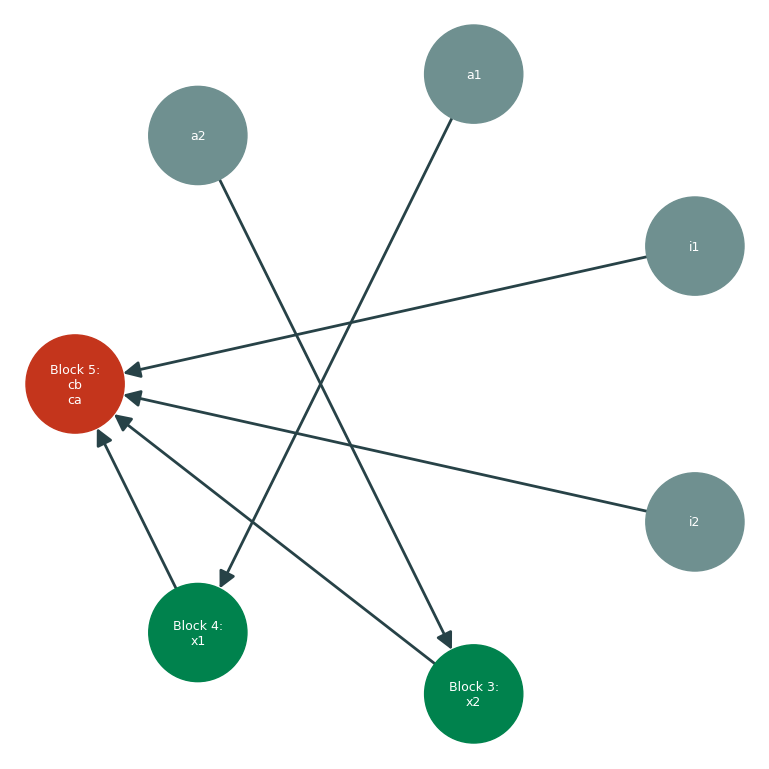

In [ ]:
model.draw_blockwise_graph('ca')

## Switch endogenous variables and analyze new model

We ask **ModelSolver** to make $x1$ exogenous and $a1$ endogenous:

In [ ]:
model.switch_endo_var(['a1'], ['x1'])

All variables in old_endo_vars are not endogenous


We inspect the blocks of this new model:

In [ ]:
model.show_blocks()

-------------------------------------------------- Block 1 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
k2

2 predetermined variables:
k2(-1) i2

1 equations:
k2 = k2(-1)+i2
-------------------------------------------------- Block 2 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
k1

2 predetermined variables:
k1(-1) i1

1 equations:
k1 = k1(-1)+i1
-------------------------------------------------- Block 3 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
x2

1 predetermined variables:
a2

1 equations:
x2 = a2
-------------------------------------------------- Block 4 --------------------------------------------------
Block consists of a definition

1 endogenous variables:
x1

1 predetermined variables:
a1

1 equations:
x1 = a1
-------------------------------------------------- Block 5 -------------------------

We make graph plot of the same variable as above showing what block it's in, and what blocks are it's ancestors and decendants.
We observe that the graph has changed after swithcing endogenous variables.

Graph of block containing ca with <=5 generations of ancestors and <=5 generations of decendants: DiGraph with 7 nodes and 6 edges


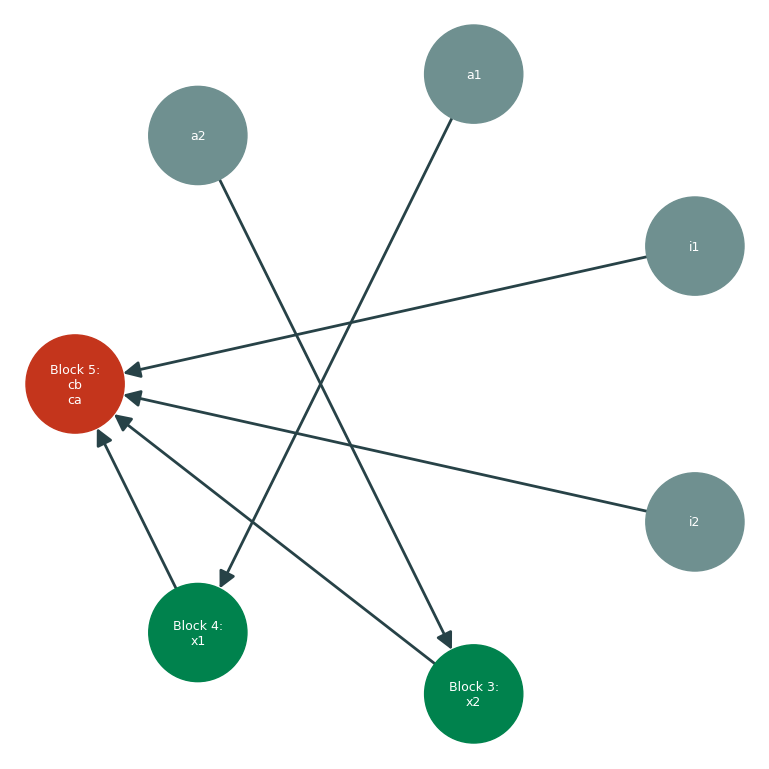

In [ ]:
model.draw_blockwise_graph('ca')

In [ ]:
model.show_block_vals(5,1)


Block 5 has endogenous variables in 2019Q2 that evaluate to:
cb=1.642857142857142
ca=3.8571428571428563

Block 5 has predetermined variables in 2020Q3 that evaluate to:
i1=4.0
i2=3.0
x2=3.0
x1=4.0


In [ ]:
model.show_block(2)

Block consists of a definition

1 endogenous variables:
k1

2 predetermined variables:
k1(-1) i1

1 equations:
k1 = k1(-1)+i1
